In [1]:
from bs4 import BeautifulSoup
import requests 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 37
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df

,reviews
0,✅ Trip Verified | I flew with British Airway...
1,✅ Trip Verified | Manchester to Copenhagen vi...
2,✅ Trip Verified | I have never seen such disr...
3,✅ Trip Verified | Paid for a 14 hour long fli...
4,✅ Trip Verified | Very inconsiderate PA annou...
...,...
3695,LHR to DXB Return. Outbound flight delayed 2 h...
3696,The outward trip Manchester - Heathrow - Milan...
3697,LHR-LAX-LHR. This route is the new A380 which ...
3698,We just flew round trip on the new A380 from L...


In [4]:

import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    text = text.lower().strip()  # Convert to lowercase and remove leading/trailing whitespaces
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,✅ Trip Verified | I flew with British Airway...,trip verified i flew with british airways ...
1,✅ Trip Verified | Manchester to Copenhagen vi...,trip verified manchester to copenhagen via ...
2,✅ Trip Verified | I have never seen such disr...,trip verified i have never seen such disres...
3,✅ Trip Verified | Paid for a 14 hour long fli...,trip verified paid for a hour long fligh...
4,✅ Trip Verified | Very inconsiderate PA annou...,trip verified very inconsiderate pa announc...


In [5]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /Users/mac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /Users/mac/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mac/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,✅ Trip Verified | I flew with British Airway...,trip verified i flew with british airways ...,"[(trip, n), (verified, v), (flew, n), (british..."
1,✅ Trip Verified | Manchester to Copenhagen vi...,trip verified manchester to copenhagen via ...,"[(trip, n), (verified, v), (manchester, n), (c..."
2,✅ Trip Verified | I have never seen such disr...,trip verified i have never seen such disres...,"[(trip, n), (verified, v), (never, r), (seen, ..."
3,✅ Trip Verified | Paid for a 14 hour long fli...,trip verified paid for a hour long fligh...,"[(trip, n), (verified, v), (paid, v), (hour, n..."
4,✅ Trip Verified | Very inconsiderate PA annou...,trip verified very inconsiderate pa announc...,"[(trip, n), (verified, v), (inconsiderate, a),..."


In [8]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,✅ Trip Verified | I flew with British Airway...,trip verified i flew with british airways ...,"[(trip, n), (verified, v), (flew, n), (british...",trip verify flew british airway heathrow han...
1,✅ Trip Verified | Manchester to Copenhagen vi...,trip verified manchester to copenhagen via ...,"[(trip, n), (verified, v), (manchester, n), (c...",trip verify manchester copenhagen via london...
2,✅ Trip Verified | I have never seen such disr...,trip verified i have never seen such disres...,"[(trip, n), (verified, v), (never, r), (seen, ...",trip verify never see disrespect customer rd...
3,✅ Trip Verified | Paid for a 14 hour long fli...,trip verified paid for a hour long fligh...,"[(trip, n), (verified, v), (paid, v), (hour, n...",trip verify pay hour long flight ticket incl...
4,✅ Trip Verified | Very inconsiderate PA annou...,trip verified very inconsiderate pa announc...,"[(trip, n), (verified, v), (inconsiderate, a),...",trip verify inconsiderate pa announcement ma...


In [9]:
df[['reviews','Lemma']]

,reviews,Lemma
0,✅ Trip Verified | I flew with British Airway...,trip verify flew british airway heathrow han...
1,✅ Trip Verified | Manchester to Copenhagen vi...,trip verify manchester copenhagen via london...
2,✅ Trip Verified | I have never seen such disr...,trip verify never see disrespect customer rd...
3,✅ Trip Verified | Paid for a 14 hour long fli...,trip verify pay hour long flight ticket incl...
4,✅ Trip Verified | Very inconsiderate PA annou...,trip verify inconsiderate pa announcement ma...
...,...,...
3695,LHR to DXB Return. Outbound flight delayed 2 h...,lhr dxb return outbound flight delay hour we...
3696,The outward trip Manchester - Heathrow - Milan...,outward trip manchester heathrow milan fine ...
3697,LHR-LAX-LHR. This route is the new A380 which ...,lhr lax lhr route new much look forward trav...
3698,We just flew round trip on the new A380 from L...,fly round trip new lax lhr rome business cla...


In [10]:
!pip install vaderSentiment

In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,✅ Trip Verified | I flew with British Airway...,trip verified i flew with british airways ...,"[(trip, n), (verified, v), (flew, n), (british...",trip verify flew british airway heathrow han...,-0.8176,Negative
1,✅ Trip Verified | Manchester to Copenhagen vi...,trip verified manchester to copenhagen via ...,"[(trip, n), (verified, v), (manchester, n), (c...",trip verify manchester copenhagen via london...,0.4215,Neutral
2,✅ Trip Verified | I have never seen such disr...,trip verified i have never seen such disres...,"[(trip, n), (verified, v), (never, r), (seen, ...",trip verify never see disrespect customer rd...,-0.3331,Negative
3,✅ Trip Verified | Paid for a 14 hour long fli...,trip verified paid for a hour long fligh...,"[(trip, n), (verified, v), (paid, v), (hour, n...",trip verify pay hour long flight ticket incl...,-0.6605,Negative
4,✅ Trip Verified | Very inconsiderate PA annou...,trip verified very inconsiderate pa announc...,"[(trip, n), (verified, v), (inconsiderate, a),...",trip verify inconsiderate pa announcement ma...,-0.9664,Negative


In [12]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    2117
Negative    1181
Neutral      402
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x13e8824d0>,
 [Text(-0.2472438858153373, 1.071853749784425, 'Positive'),
  Text(-0.12581238239484588, -1.0927814257371569, 'Negative'),
  Text(1.2721189653412097, -0.4518996990696172, 'Neutral')],
 [Text(-0.13486030135382032, 0.5846474998824135, '57.2%'),
  Text(-0.0686249358517341, -0.5960625958566309, '31.9%'),
  Text(0.8009637929926133, -0.28452944015494414, '10.9%')])

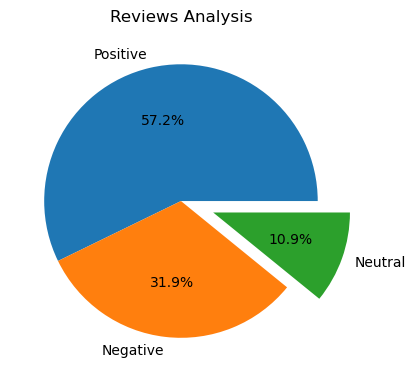

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [14]:
df.to_csv("BA_reviews.csv")

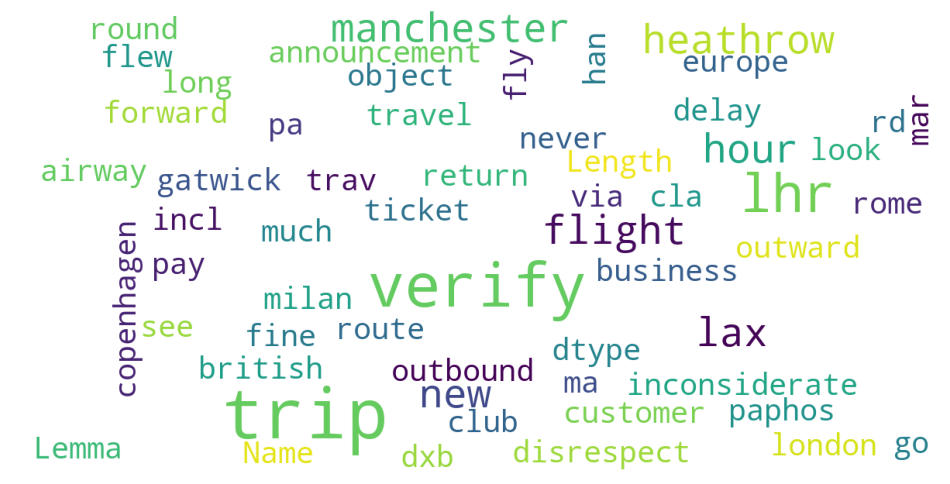

In [15]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)
